#Duomenų nuskaitymas ir petvarkymas

In [1]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x = np.concatenate((x_train, x_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

print("Apjungta bendra duomenų aibė:")
print("x:", x.shape)
print("y:", y.shape)

x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2)
x_test, x_val, y_test, y_val = train_test_split(x_temp, y_temp, test_size=0.5)
x_train = np.expand_dims(x_train, axis=-1)

print("Mokymo duomenų aibė:")
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)

print("Testavimo duomenų aibė:")
print("x_test:", x_test.shape)
print("y_test:", y_test.shape)

print("Validavimo duomenų aibė:")
print("x_val:", x_val.shape)
print("y_val:", y_val.shape)



ModuleNotFoundError: No module named 'tensorflow'

# Klasių pavyzdžiai

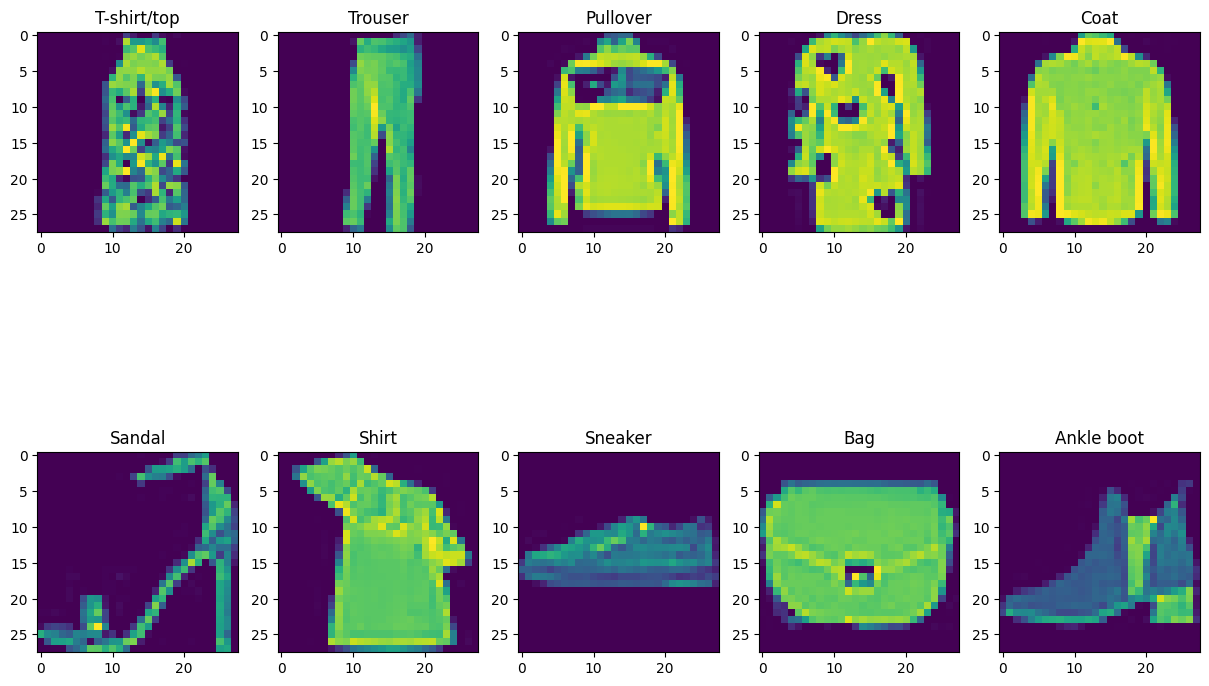

In [3]:
import matplotlib.pyplot as plt

class_labels = [
    "T-shirt/top", "Trouser", "Pullover", "Dress",
    "Coat", "Sandal", "Shirt", "Sneaker",
    "Bag", "Ankle boot"
]

fig, ax = plt.subplots(2,5,figsize=(15, 10))
for index,cls in enumerate(class_labels):
  example = np.where(y_test == index)[0][0]
  ax[index//5,index%5].imshow(x_test[example])
  ax[index//5,index%5].set_title(cls)

In [4]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

def createModel(class_names, activationFunction, IMG_HEIGHT, IMG_WIDTH, num_conv_layers=3, num_kernels=[16, 32, 64],
                kernel_size=3, pool_size=2, dense_units=128, dropout_prob=0.0,batchNormalization=False):
    num_classes = len(class_names)
    model = Sequential([
        layers.Rescaling(1./255, input_shape=(IMG_HEIGHT, IMG_WIDTH, 1))
    ])

    for i in range(num_conv_layers):
        model.add(layers.Conv2D(num_kernels[i], kernel_size, padding='same', activation=activationFunction))
        if batchNormalization:
              model.add(layers.BatchNormalization())
        model.add(layers.MaxPooling2D(pool_size=pool_size))

    model.add(layers.Flatten())
    model.add(layers.Dense(dense_units, activation=activationFunction)) #Pasleptasis sluoksnis

    if dropout_prob > 0.0 and dropout_prob < 1.0:
        model.add(layers.Dropout(dropout_prob))

    model.add(layers.Dense(num_classes)) #Išvesties sluoksnis

    return model


def trainModel(model, x_train, y_train, x_val, y_val, optimizer,loss_function,epochs, batch_size=32,verbos=1):
    model.compile(optimizer=optimizer,
                  loss=loss_function,
                  metrics=['accuracy'])

    history = model.fit(x_train, y_train, epochs=epochs,
                        validation_data=(x_val, y_val),
                        verbose=verbos, batch_size=batch_size)

    return history

model1 = createModel(class_labels, activationFunction='relu',
                    IMG_HEIGHT=28, IMG_WIDTH=28,
                    num_conv_layers=3, num_kernels=[16, 32, 64],
                    kernel_size=3, pool_size=2, dense_units=128, dropout_prob=0)

model1.summary()

history1 = trainModel(model1, x_train, y_train, x_val, y_val,
                     optimizer='adam',
                     loss_function=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                     epochs=10, batch_size=32)

model2 = createModel(class_labels, activationFunction='relu',
                    IMG_HEIGHT=28, IMG_WIDTH=28,
                    num_conv_layers=4, num_kernels=[8, 16, 32,64],
                    kernel_size=3, pool_size=2, dense_units=256, dropout_prob=0)

model2.summary()

history2 = trainModel(model2, x_train, y_train, x_val, y_val,
                     optimizer='adam',
                     loss_function=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                     epochs=10, batch_size=32)


model3 = createModel(class_labels, activationFunction='relu',
                    IMG_HEIGHT=28, IMG_WIDTH=28,
                    num_conv_layers=2, num_kernels=[8, 16],
                    kernel_size=3, pool_size=2, dense_units=64, dropout_prob=0)
model3.summary()

history3 = trainModel(model3, x_train, y_train, x_val, y_val,
                     optimizer='adam',
                     loss_function=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                     epochs=10, batch_size=32)



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          1

# Grafikų braižymas

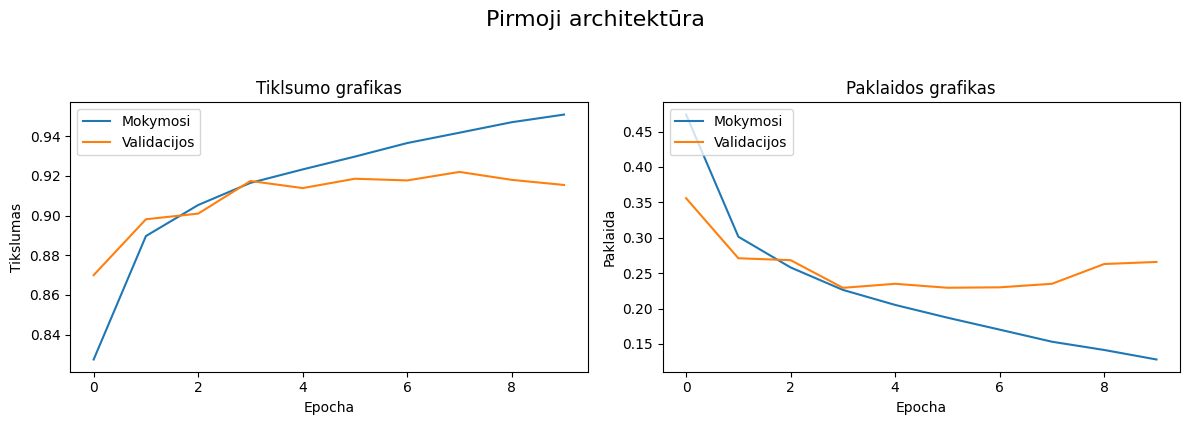

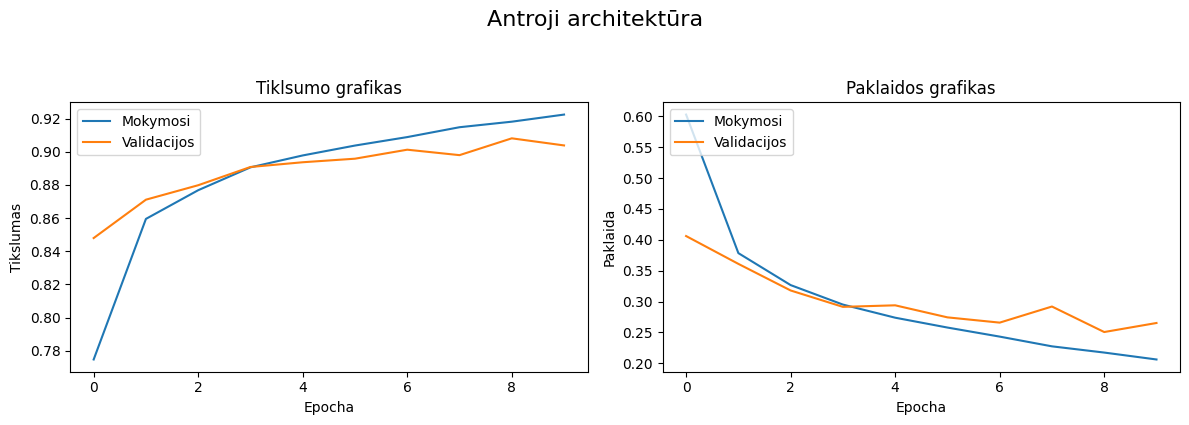

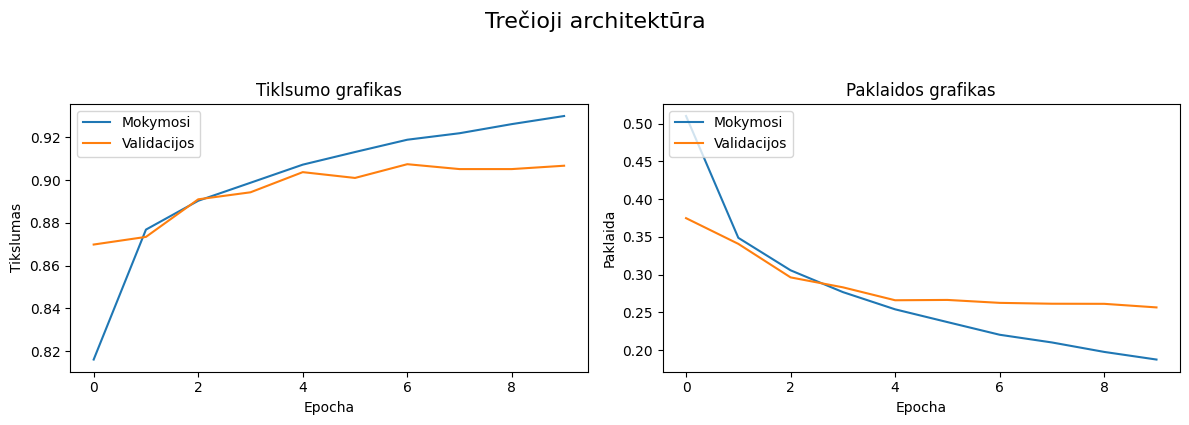

In [ ]:
import matplotlib.pyplot as plt

def plots(history, pavadinimas):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Tiklsumo grafikas', loc='center')
    plt.xlabel('Epocha')
    plt.ylabel('Tikslumas')
    plt.legend(['Mokymosi', 'Validacijos'], loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Paklaidos grafikas', loc='center')
    plt.xlabel('Epocha')
    plt.ylabel('Paklaida')
    plt.legend(['Mokymosi', 'Validacijos'], loc='upper left')

    plt.suptitle(pavadinimas, fontsize=16, y=1.05)

    plt.tight_layout()
    plt.show()
plots(history1,'Pirmoji architektūra')

plots(history2,'Antroji architektūra')

plots(history3,'Trečioji architektūra')

# Hiperparametrų tyrimas

Epoch 1/10
1750/1750 [==============================] - 18s 7ms/step - loss: 0.3849 - accuracy: 0.8572 - val_loss: 0.3106 - val_accuracy: 0.8850
Epoch 2/10
1750/1750 [==============================] - 9s 5ms/step - loss: 0.2674 - accuracy: 0.9012 - val_loss: 0.2779 - val_accuracy: 0.8990
Epoch 3/10
1750/1750 [==============================] - 9s 5ms/step - loss: 0.2295 - accuracy: 0.9141 - val_loss: 0.2736 - val_accuracy: 0.9026
Epoch 4/10
1750/1750 [==============================] - 9s 5ms/step - loss: 0.2058 - accuracy: 0.9221 - val_loss: 0.2500 - val_accuracy: 0.9107
Epoch 5/10
1750/1750 [==============================] - 9s 5ms/step - loss: 0.1814 - accuracy: 0.9314 - val_loss: 0.4837 - val_accuracy: 0.8430
Epoch 6/10
1750/1750 [==============================] - 10s 5ms/step - loss: 0.1609 - accuracy: 0.9393 - val_loss: 0.2583 - val_accuracy: 0.9179
Epoch 7/10
1750/1750 [==============================] - 10s 6ms/step - loss: 0.1429 - accuracy: 0.9463 - val_loss: 0.2562 - val_accura

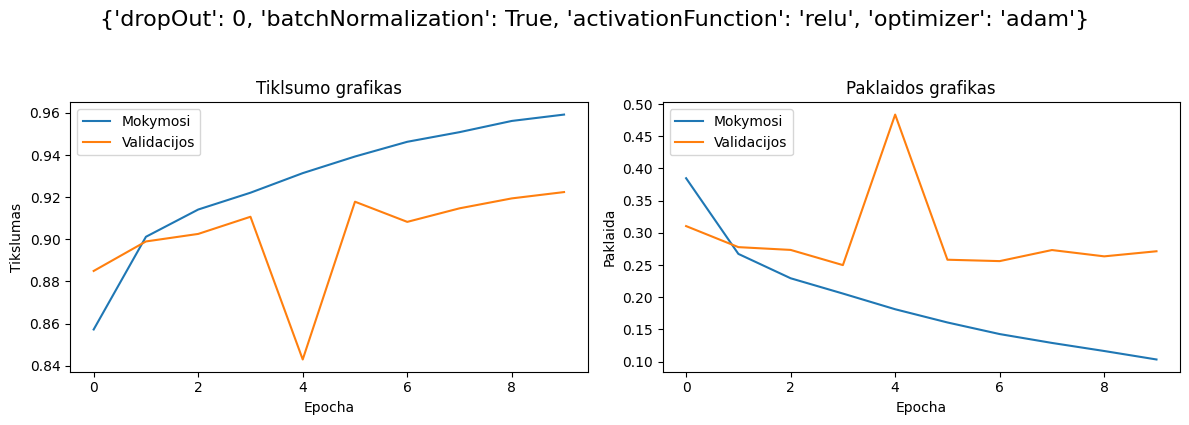

Epoch 1/10
1750/1750 [==============================] - 11s 5ms/step - loss: 0.4365 - accuracy: 0.8419 - val_loss: 0.3624 - val_accuracy: 0.8679
Epoch 2/10
1750/1750 [==============================] - 9s 5ms/step - loss: 0.3018 - accuracy: 0.8890 - val_loss: 0.3071 - val_accuracy: 0.8874
Epoch 3/10
1750/1750 [==============================] - 8s 5ms/step - loss: 0.2622 - accuracy: 0.9029 - val_loss: 0.2908 - val_accuracy: 0.8984
Epoch 4/10
1750/1750 [==============================] - 9s 5ms/step - loss: 0.2374 - accuracy: 0.9115 - val_loss: 0.2739 - val_accuracy: 0.8993
Epoch 5/10
1750/1750 [==============================] - 9s 5ms/step - loss: 0.2168 - accuracy: 0.9199 - val_loss: 0.2596 - val_accuracy: 0.9059
Epoch 6/10
1750/1750 [==============================] - 8s 5ms/step - loss: 0.2026 - accuracy: 0.9261 - val_loss: 0.3182 - val_accuracy: 0.8863
Epoch 7/10
1750/1750 [==============================] - 9s 5ms/step - loss: 0.1883 - accuracy: 0.9306 - val_loss: 0.2457 - val_accuracy

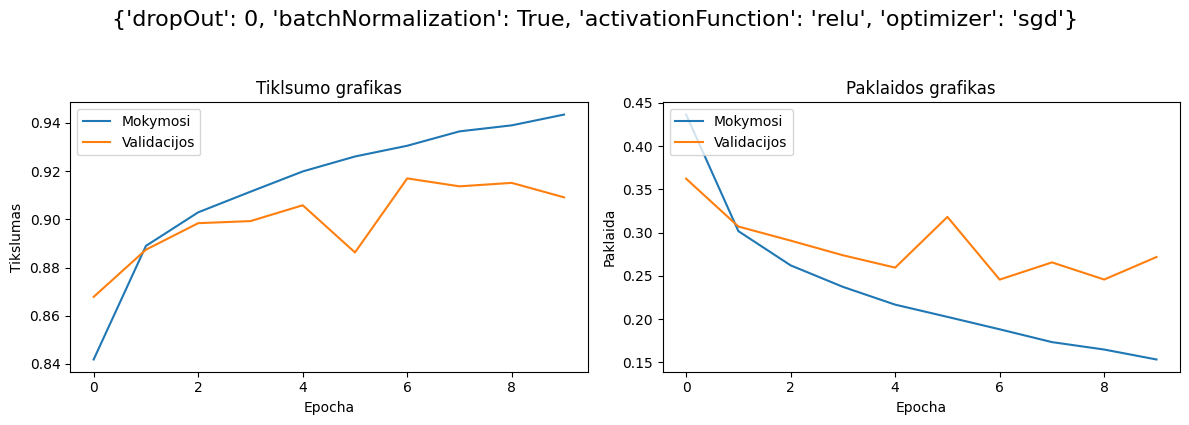

Epoch 1/10
1750/1750 [==============================] - 12s 6ms/step - loss: 0.4125 - accuracy: 0.8543 - val_loss: 0.2921 - val_accuracy: 0.8961
Epoch 2/10
1750/1750 [==============================] - 10s 6ms/step - loss: 0.2726 - accuracy: 0.9005 - val_loss: 0.2464 - val_accuracy: 0.9096
Epoch 3/10
1750/1750 [==============================] - 9s 5ms/step - loss: 0.2283 - accuracy: 0.9162 - val_loss: 0.2655 - val_accuracy: 0.8997
Epoch 4/10
1750/1750 [==============================] - 10s 6ms/step - loss: 0.2018 - accuracy: 0.9250 - val_loss: 0.2780 - val_accuracy: 0.8943
Epoch 5/10
1750/1750 [==============================] - 10s 6ms/step - loss: 0.1758 - accuracy: 0.9350 - val_loss: 0.2411 - val_accuracy: 0.9143
Epoch 6/10
1750/1750 [==============================] - 9s 5ms/step - loss: 0.1568 - accuracy: 0.9416 - val_loss: 0.2490 - val_accuracy: 0.9116
Epoch 7/10
1750/1750 [==============================] - 10s 6ms/step - loss: 0.1389 - accuracy: 0.9483 - val_loss: 0.2334 - val_accu

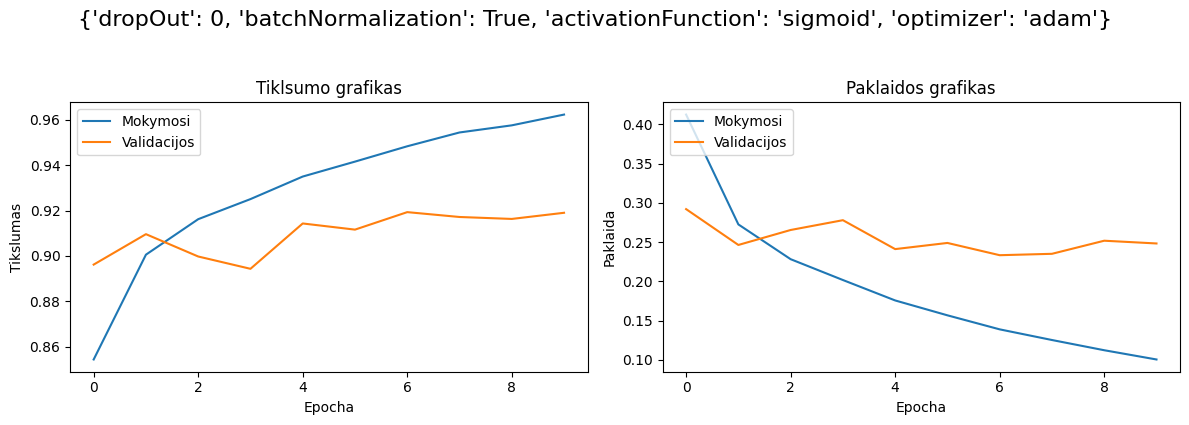

Epoch 1/10
1750/1750 [==============================] - 11s 6ms/step - loss: 0.7366 - accuracy: 0.7810 - val_loss: 0.5013 - val_accuracy: 0.8344
Epoch 2/10
1750/1750 [==============================] - 9s 5ms/step - loss: 0.4330 - accuracy: 0.8539 - val_loss: 0.3963 - val_accuracy: 0.8661
Epoch 3/10
1750/1750 [==============================] - 10s 6ms/step - loss: 0.3636 - accuracy: 0.8747 - val_loss: 0.3486 - val_accuracy: 0.8826
Epoch 4/10
1750/1750 [==============================] - 10s 5ms/step - loss: 0.3238 - accuracy: 0.8880 - val_loss: 0.3325 - val_accuracy: 0.8819
Epoch 5/10
1750/1750 [==============================] - 9s 5ms/step - loss: 0.2973 - accuracy: 0.8963 - val_loss: 0.2989 - val_accuracy: 0.8944
Epoch 6/10
1750/1750 [==============================] - 10s 6ms/step - loss: 0.2766 - accuracy: 0.9038 - val_loss: 0.2864 - val_accuracy: 0.9003
Epoch 7/10
1750/1750 [==============================] - 10s 5ms/step - loss: 0.2602 - accuracy: 0.9089 - val_loss: 0.2735 - val_accu

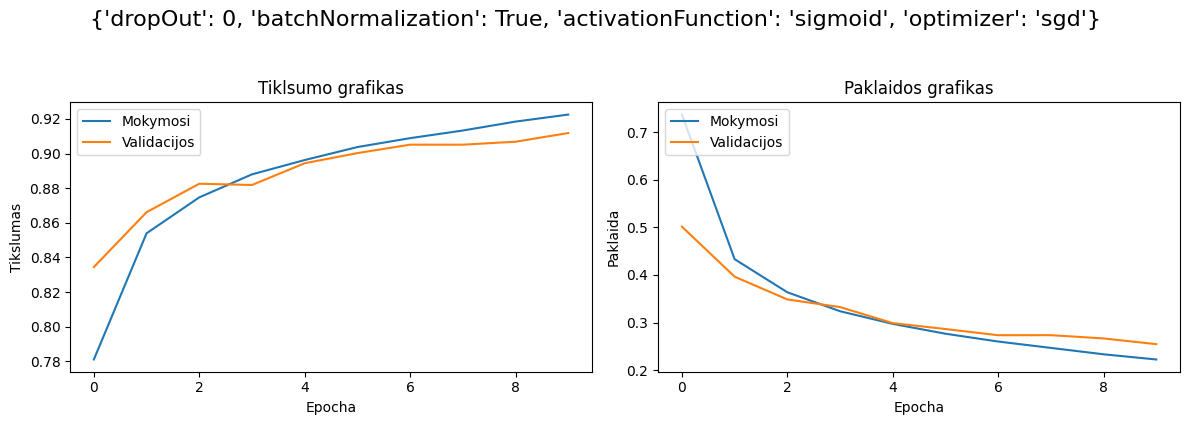

Epoch 1/10
1750/1750 [==============================] - 10s 5ms/step - loss: 0.4838 - accuracy: 0.8240 - val_loss: 0.3350 - val_accuracy: 0.8824
Epoch 2/10
1750/1750 [==============================] - 8s 4ms/step - loss: 0.3088 - accuracy: 0.8871 - val_loss: 0.2859 - val_accuracy: 0.8984
Epoch 3/10
1750/1750 [==============================] - 9s 5ms/step - loss: 0.2635 - accuracy: 0.9037 - val_loss: 0.2571 - val_accuracy: 0.9086
Epoch 4/10
1750/1750 [==============================] - 8s 4ms/step - loss: 0.2347 - accuracy: 0.9131 - val_loss: 0.2565 - val_accuracy: 0.9073
Epoch 5/10
1750/1750 [==============================] - 9s 5ms/step - loss: 0.2105 - accuracy: 0.9219 - val_loss: 0.2443 - val_accuracy: 0.9154
Epoch 6/10
1750/1750 [==============================] - 8s 5ms/step - loss: 0.1923 - accuracy: 0.9281 - val_loss: 0.2316 - val_accuracy: 0.9201
Epoch 7/10
1750/1750 [==============================] - 8s 5ms/step - loss: 0.1739 - accuracy: 0.9338 - val_loss: 0.2818 - val_accuracy

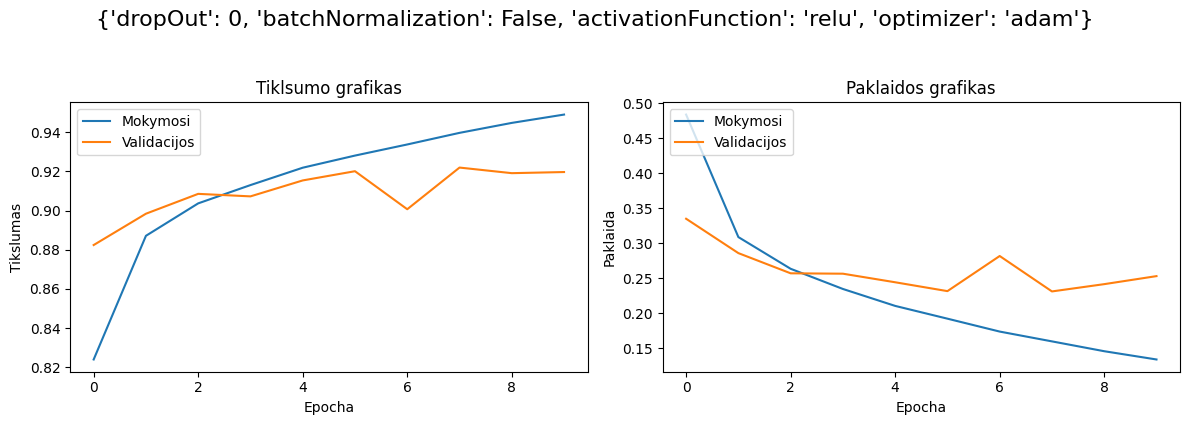

Epoch 1/10
1750/1750 [==============================] - 9s 5ms/step - loss: 0.9564 - accuracy: 0.6533 - val_loss: 0.6182 - val_accuracy: 0.7784
Epoch 2/10
1750/1750 [==============================] - 8s 4ms/step - loss: 0.5436 - accuracy: 0.7989 - val_loss: 0.5196 - val_accuracy: 0.8183
Epoch 3/10
1750/1750 [==============================] - 8s 5ms/step - loss: 0.4558 - accuracy: 0.8334 - val_loss: 0.4201 - val_accuracy: 0.8511
Epoch 4/10
1750/1750 [==============================] - 7s 4ms/step - loss: 0.4074 - accuracy: 0.8525 - val_loss: 0.4042 - val_accuracy: 0.8549
Epoch 5/10
1750/1750 [==============================] - 8s 5ms/step - loss: 0.3768 - accuracy: 0.8634 - val_loss: 0.3830 - val_accuracy: 0.8561
Epoch 6/10
1750/1750 [==============================] - 8s 5ms/step - loss: 0.3547 - accuracy: 0.8703 - val_loss: 0.3796 - val_accuracy: 0.8639
Epoch 7/10
1750/1750 [==============================] - 8s 4ms/step - loss: 0.3349 - accuracy: 0.8762 - val_loss: 0.3382 - val_accuracy:

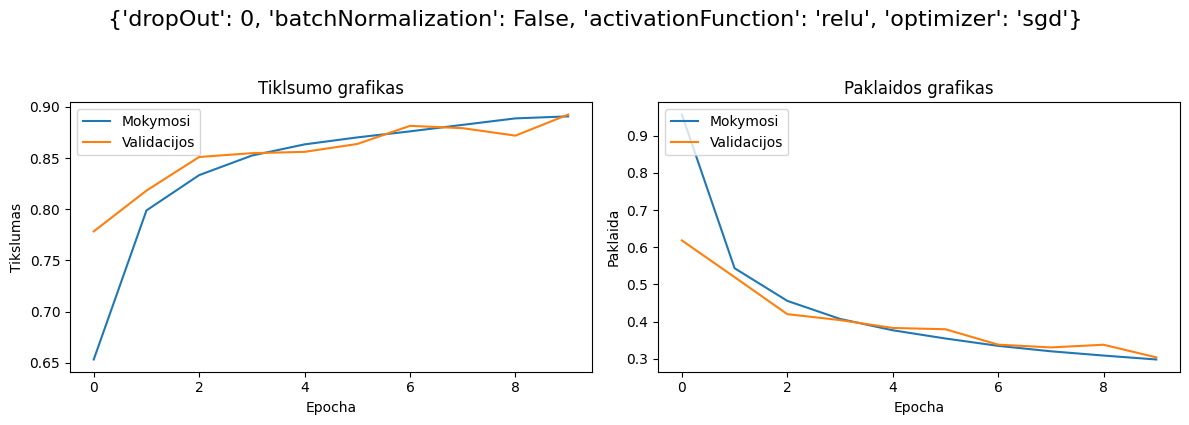

Epoch 1/10
1750/1750 [==============================] - 11s 5ms/step - loss: 0.9519 - accuracy: 0.6435 - val_loss: 0.5693 - val_accuracy: 0.7909
Epoch 2/10
1750/1750 [==============================] - 8s 5ms/step - loss: 0.5208 - accuracy: 0.8033 - val_loss: 0.4874 - val_accuracy: 0.8153
Epoch 3/10
1750/1750 [==============================] - 9s 5ms/step - loss: 0.4402 - accuracy: 0.8332 - val_loss: 0.4092 - val_accuracy: 0.8507
Epoch 4/10
1750/1750 [==============================] - 8s 5ms/step - loss: 0.3897 - accuracy: 0.8548 - val_loss: 0.3849 - val_accuracy: 0.8563
Epoch 5/10
1750/1750 [==============================] - 8s 5ms/step - loss: 0.3591 - accuracy: 0.8655 - val_loss: 0.3441 - val_accuracy: 0.8723
Epoch 6/10
1750/1750 [==============================] - 9s 5ms/step - loss: 0.3380 - accuracy: 0.8741 - val_loss: 0.3429 - val_accuracy: 0.8741
Epoch 7/10
1750/1750 [==============================] - 8s 5ms/step - loss: 0.3223 - accuracy: 0.8777 - val_loss: 0.3231 - val_accuracy

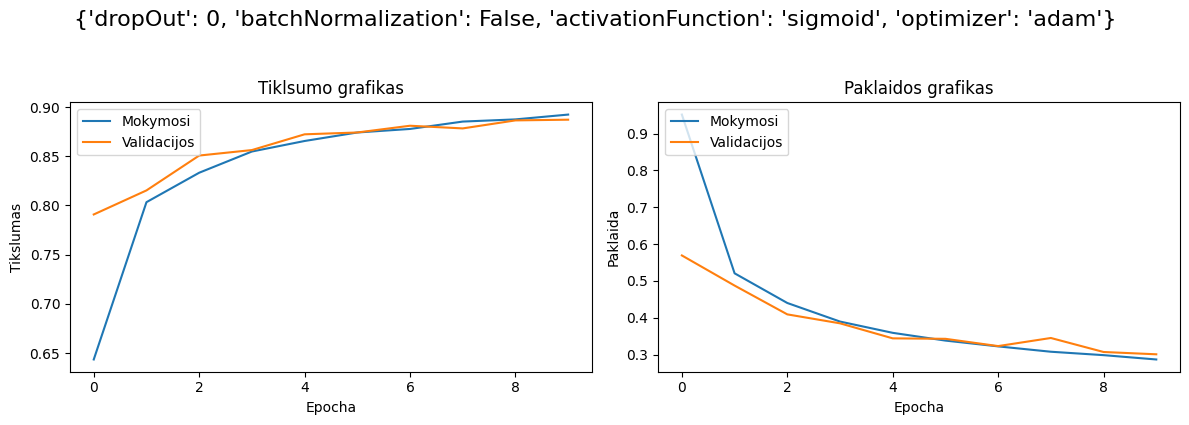

Epoch 1/10
1750/1750 [==============================] - 9s 5ms/step - loss: 2.3065 - accuracy: 0.0992 - val_loss: 2.3036 - val_accuracy: 0.1039
Epoch 2/10
1750/1750 [==============================] - 9s 5ms/step - loss: 2.3057 - accuracy: 0.1015 - val_loss: 2.3047 - val_accuracy: 0.1039
Epoch 3/10
1750/1750 [==============================] - 9s 5ms/step - loss: 2.3053 - accuracy: 0.0997 - val_loss: 2.3045 - val_accuracy: 0.1019
Epoch 4/10
1750/1750 [==============================] - 8s 4ms/step - loss: 2.3051 - accuracy: 0.1029 - val_loss: 2.3047 - val_accuracy: 0.0993
Epoch 5/10
1750/1750 [==============================] - 9s 5ms/step - loss: 2.3051 - accuracy: 0.1005 - val_loss: 2.3057 - val_accuracy: 0.0993
Epoch 6/10
1750/1750 [==============================] - 8s 4ms/step - loss: 2.3046 - accuracy: 0.1010 - val_loss: 2.3059 - val_accuracy: 0.0991
Epoch 7/10
1750/1750 [==============================] - 9s 5ms/step - loss: 2.3040 - accuracy: 0.1061 - val_loss: 2.3034 - val_accuracy:

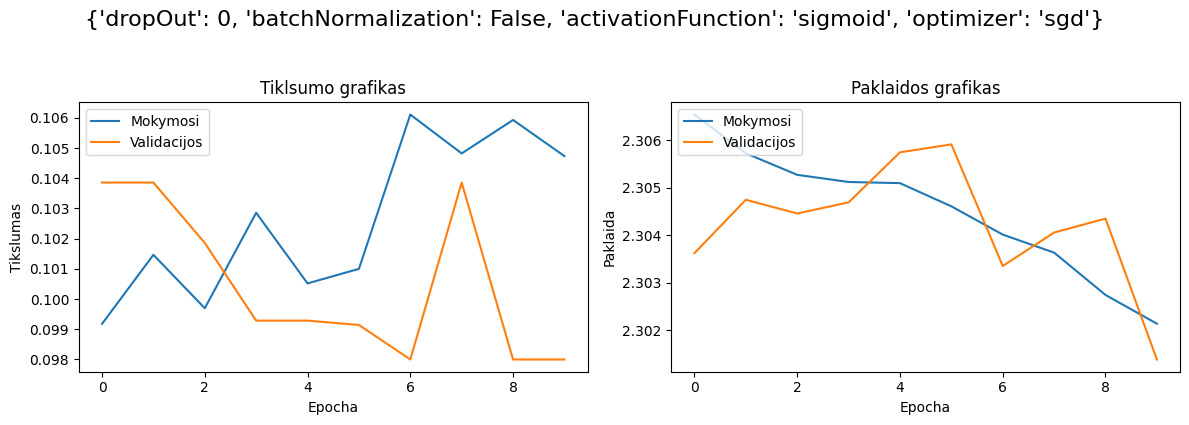

Epoch 1/10
1750/1750 [==============================] - 14s 6ms/step - loss: 0.4385 - accuracy: 0.8401 - val_loss: 0.3194 - val_accuracy: 0.8811
Epoch 2/10
1750/1750 [==============================] - 10s 6ms/step - loss: 0.3029 - accuracy: 0.8876 - val_loss: 0.2744 - val_accuracy: 0.9039
Epoch 3/10
1750/1750 [==============================] - 10s 6ms/step - loss: 0.2622 - accuracy: 0.9032 - val_loss: 0.2925 - val_accuracy: 0.8933
Epoch 4/10
1750/1750 [==============================] - 10s 6ms/step - loss: 0.2384 - accuracy: 0.9118 - val_loss: 0.2549 - val_accuracy: 0.9093
Epoch 5/10
1750/1750 [==============================] - 10s 6ms/step - loss: 0.2152 - accuracy: 0.9188 - val_loss: 0.2954 - val_accuracy: 0.8879
Epoch 6/10
1750/1750 [==============================] - 10s 6ms/step - loss: 0.2000 - accuracy: 0.9241 - val_loss: 0.2309 - val_accuracy: 0.9187
Epoch 7/10
1750/1750 [==============================] - 10s 6ms/step - loss: 0.1850 - accuracy: 0.9309 - val_loss: 0.2716 - val_ac

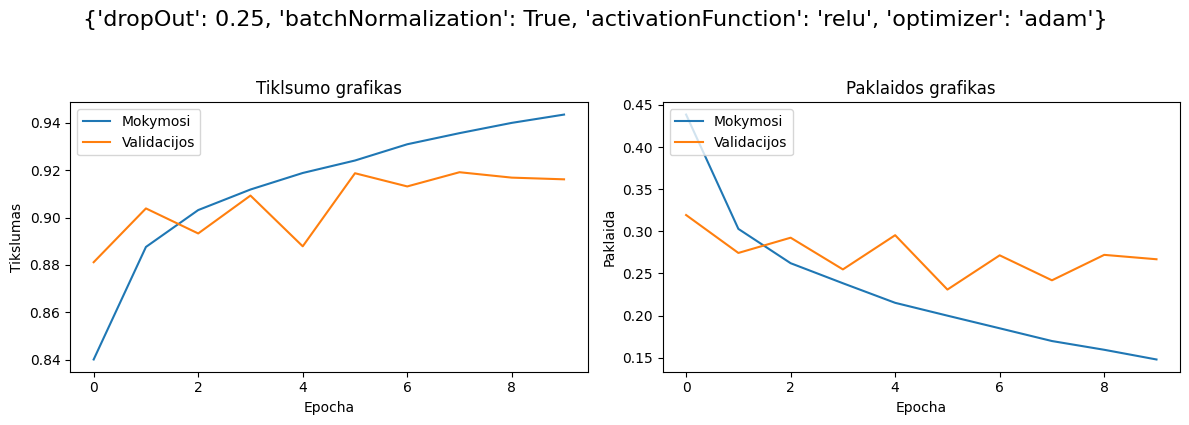

Epoch 1/10
1750/1750 [==============================] - 12s 6ms/step - loss: 0.4986 - accuracy: 0.8216 - val_loss: 0.3402 - val_accuracy: 0.8746
Epoch 2/10
1750/1750 [==============================] - 10s 6ms/step - loss: 0.3455 - accuracy: 0.8739 - val_loss: 0.2964 - val_accuracy: 0.8924
Epoch 3/10
1750/1750 [==============================] - 10s 6ms/step - loss: 0.3040 - accuracy: 0.8891 - val_loss: 0.2742 - val_accuracy: 0.8986
Epoch 4/10
1750/1750 [==============================] - 10s 5ms/step - loss: 0.2758 - accuracy: 0.8992 - val_loss: 0.2667 - val_accuracy: 0.9039
Epoch 5/10
1750/1750 [==============================] - 10s 6ms/step - loss: 0.2557 - accuracy: 0.9058 - val_loss: 0.2536 - val_accuracy: 0.9091
Epoch 6/10
1750/1750 [==============================] - 10s 6ms/step - loss: 0.2392 - accuracy: 0.9125 - val_loss: 0.2932 - val_accuracy: 0.8963
Epoch 7/10
1750/1750 [==============================] - 10s 5ms/step - loss: 0.2259 - accuracy: 0.9167 - val_loss: 0.2990 - val_ac

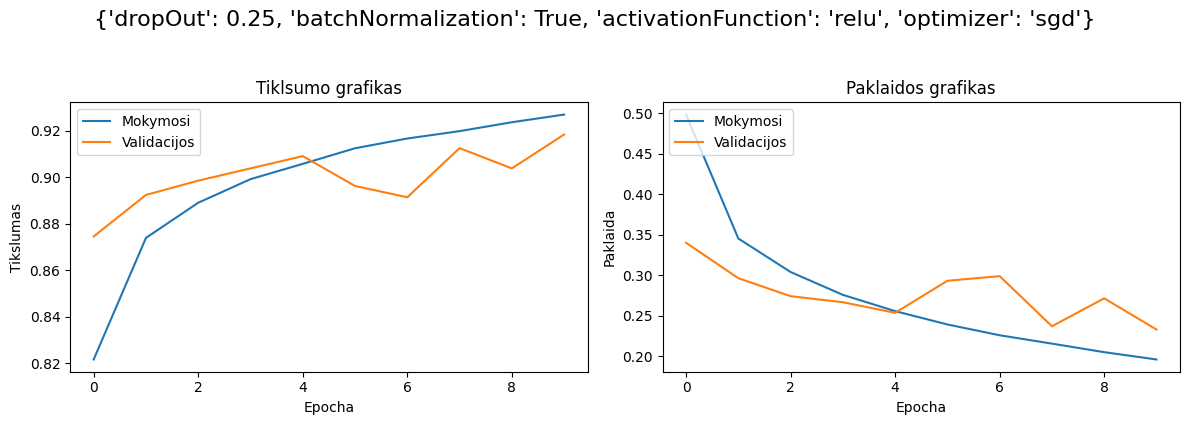

Epoch 1/10
1750/1750 [==============================] - 13s 6ms/step - loss: 0.4470 - accuracy: 0.8434 - val_loss: 0.3019 - val_accuracy: 0.8919
Epoch 2/10
1750/1750 [==============================] - 10s 6ms/step - loss: 0.2929 - accuracy: 0.8949 - val_loss: 0.2715 - val_accuracy: 0.9027
Epoch 3/10
1750/1750 [==============================] - 11s 6ms/step - loss: 0.2515 - accuracy: 0.9090 - val_loss: 0.2394 - val_accuracy: 0.9141
Epoch 4/10
1750/1750 [==============================] - 11s 6ms/step - loss: 0.2236 - accuracy: 0.9196 - val_loss: 0.2330 - val_accuracy: 0.9166
Epoch 5/10
1750/1750 [==============================] - 10s 6ms/step - loss: 0.2015 - accuracy: 0.9260 - val_loss: 0.2395 - val_accuracy: 0.9153
Epoch 6/10
1750/1750 [==============================] - 11s 6ms/step - loss: 0.1841 - accuracy: 0.9326 - val_loss: 0.2492 - val_accuracy: 0.9141
Epoch 7/10
1750/1750 [==============================] - 11s 6ms/step - loss: 0.1683 - accuracy: 0.9386 - val_loss: 0.2445 - val_ac

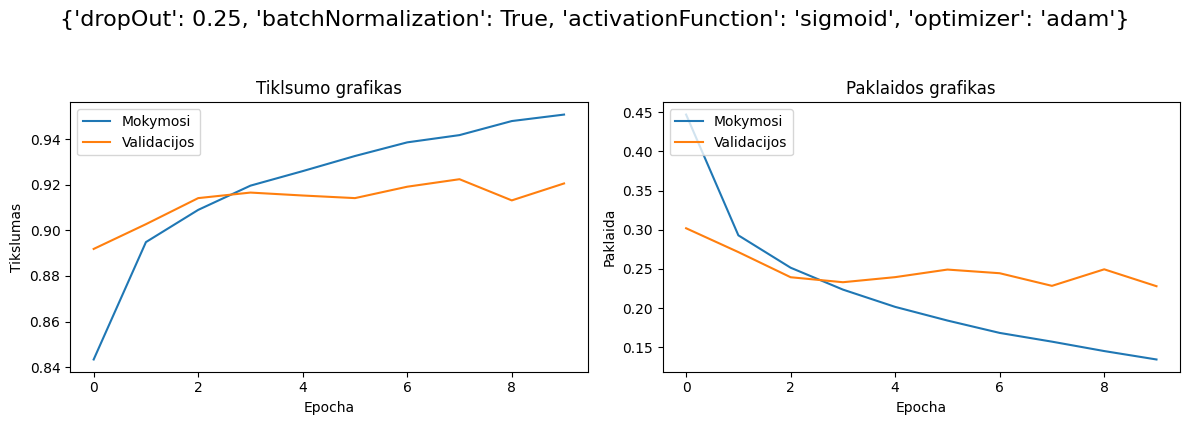

Epoch 1/10
1750/1750 [==============================] - 12s 6ms/step - loss: 0.7900 - accuracy: 0.7390 - val_loss: 0.5039 - val_accuracy: 0.8283
Epoch 2/10
1750/1750 [==============================] - 10s 6ms/step - loss: 0.4843 - accuracy: 0.8326 - val_loss: 0.4069 - val_accuracy: 0.8601
Epoch 3/10
1750/1750 [==============================] - 10s 6ms/step - loss: 0.4067 - accuracy: 0.8590 - val_loss: 0.3559 - val_accuracy: 0.8759
Epoch 4/10
1750/1750 [==============================] - 10s 6ms/step - loss: 0.3650 - accuracy: 0.8723 - val_loss: 0.3290 - val_accuracy: 0.8880
Epoch 5/10
1750/1750 [==============================] - 10s 6ms/step - loss: 0.3364 - accuracy: 0.8818 - val_loss: 0.3114 - val_accuracy: 0.8906
Epoch 6/10
1750/1750 [==============================] - 10s 6ms/step - loss: 0.3127 - accuracy: 0.8897 - val_loss: 0.2994 - val_accuracy: 0.8939
Epoch 7/10
1750/1750 [==============================] - 10s 6ms/step - loss: 0.2957 - accuracy: 0.8953 - val_loss: 0.3074 - val_ac

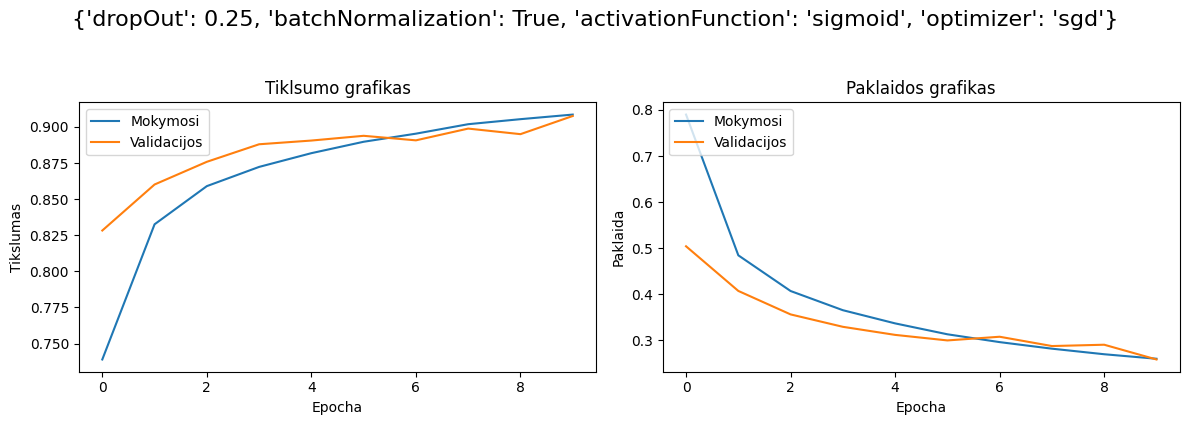

Epoch 1/10
1750/1750 [==============================] - 10s 5ms/step - loss: 0.5497 - accuracy: 0.8000 - val_loss: 0.3648 - val_accuracy: 0.8644
Epoch 2/10
1750/1750 [==============================] - 9s 5ms/step - loss: 0.3457 - accuracy: 0.8741 - val_loss: 0.3087 - val_accuracy: 0.8843
Epoch 3/10
1750/1750 [==============================] - 9s 5ms/step - loss: 0.3005 - accuracy: 0.8899 - val_loss: 0.2963 - val_accuracy: 0.8880
Epoch 4/10
1750/1750 [==============================] - 8s 5ms/step - loss: 0.2687 - accuracy: 0.8993 - val_loss: 0.2521 - val_accuracy: 0.9066
Epoch 5/10
1750/1750 [==============================] - 9s 5ms/step - loss: 0.2463 - accuracy: 0.9090 - val_loss: 0.2360 - val_accuracy: 0.9123
Epoch 6/10
1750/1750 [==============================] - 8s 5ms/step - loss: 0.2274 - accuracy: 0.9159 - val_loss: 0.2400 - val_accuracy: 0.9121
Epoch 7/10
1750/1750 [==============================] - 9s 5ms/step - loss: 0.2138 - accuracy: 0.9209 - val_loss: 0.2425 - val_accuracy

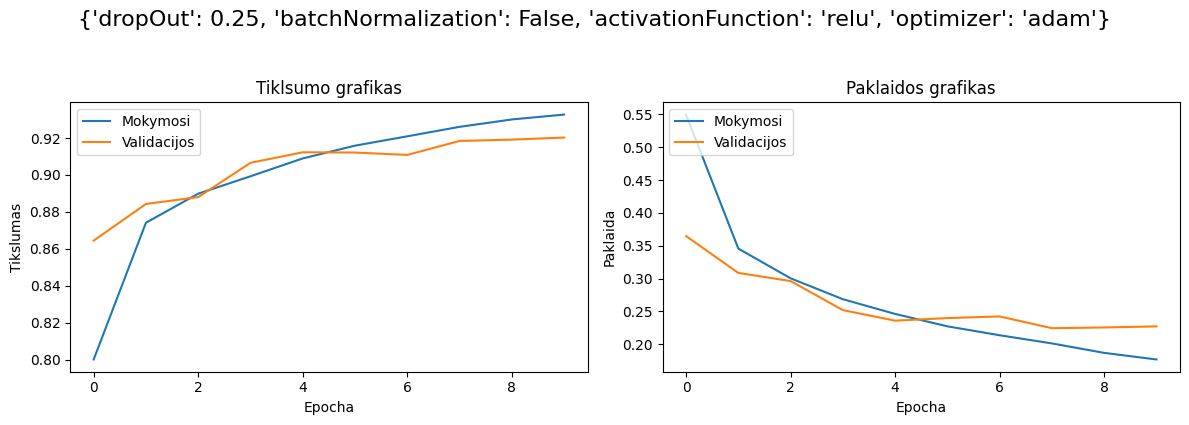

Epoch 1/10
1750/1750 [==============================] - 10s 5ms/step - loss: 0.9897 - accuracy: 0.6360 - val_loss: 0.6413 - val_accuracy: 0.7593
Epoch 2/10
1750/1750 [==============================] - 8s 5ms/step - loss: 0.6061 - accuracy: 0.7739 - val_loss: 0.5198 - val_accuracy: 0.8107
Epoch 3/10
1750/1750 [==============================] - 9s 5ms/step - loss: 0.5208 - accuracy: 0.8077 - val_loss: 0.4526 - val_accuracy: 0.8413
Epoch 4/10
1750/1750 [==============================] - 8s 5ms/step - loss: 0.4726 - accuracy: 0.8265 - val_loss: 0.4191 - val_accuracy: 0.8413
Epoch 5/10
1750/1750 [==============================] - 9s 5ms/step - loss: 0.4409 - accuracy: 0.8376 - val_loss: 0.3985 - val_accuracy: 0.8581
Epoch 6/10
1750/1750 [==============================] - 9s 5ms/step - loss: 0.4182 - accuracy: 0.8468 - val_loss: 0.3677 - val_accuracy: 0.8694
Epoch 7/10
1750/1750 [==============================] - 8s 5ms/step - loss: 0.4016 - accuracy: 0.8528 - val_loss: 0.3638 - val_accuracy

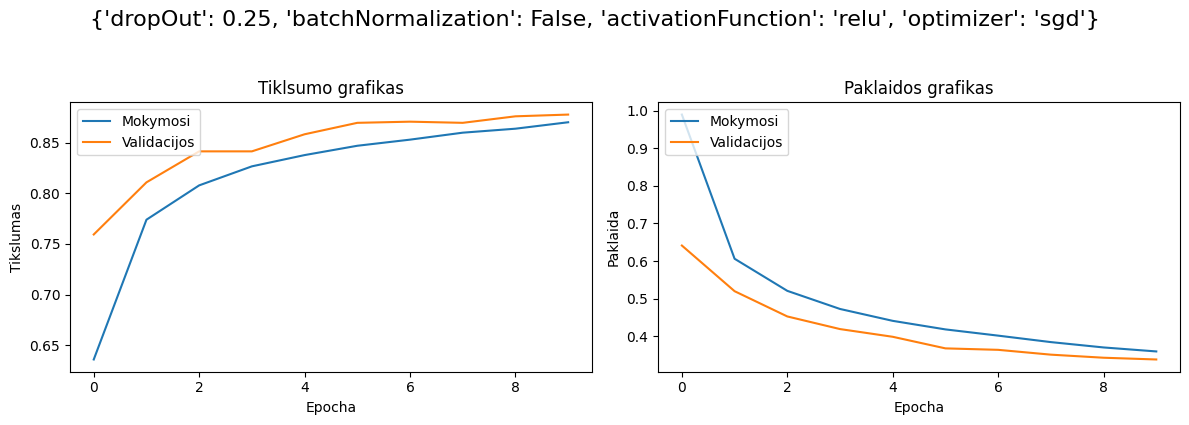

Epoch 1/10
1750/1750 [==============================] - 11s 5ms/step - loss: 1.1167 - accuracy: 0.5791 - val_loss: 0.5728 - val_accuracy: 0.7851
Epoch 2/10
1750/1750 [==============================] - 9s 5ms/step - loss: 0.5395 - accuracy: 0.7987 - val_loss: 0.4702 - val_accuracy: 0.8269
Epoch 3/10
1750/1750 [==============================] - 9s 5ms/step - loss: 0.4498 - accuracy: 0.8328 - val_loss: 0.3941 - val_accuracy: 0.8569
Epoch 4/10
1750/1750 [==============================] - 9s 5ms/step - loss: 0.3982 - accuracy: 0.8498 - val_loss: 0.3636 - val_accuracy: 0.8696
Epoch 5/10
1750/1750 [==============================] - 9s 5ms/step - loss: 0.3653 - accuracy: 0.8627 - val_loss: 0.3334 - val_accuracy: 0.8746
Epoch 6/10
1750/1750 [==============================] - 9s 5ms/step - loss: 0.3440 - accuracy: 0.8711 - val_loss: 0.3277 - val_accuracy: 0.8814
Epoch 7/10
1750/1750 [==============================] - 9s 5ms/step - loss: 0.3261 - accuracy: 0.8775 - val_loss: 0.3145 - val_accuracy

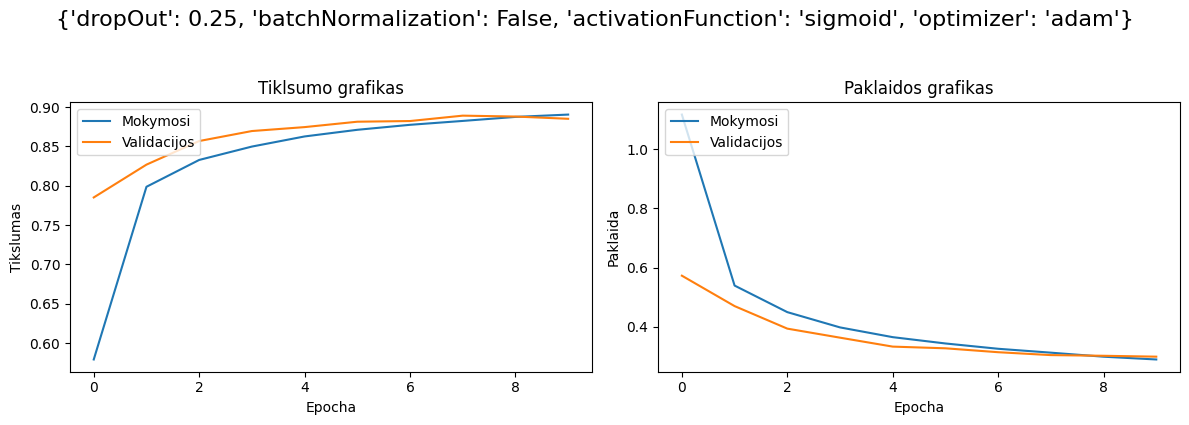

Epoch 1/10
1750/1750 [==============================] - 10s 6ms/step - loss: 2.3429 - accuracy: 0.0992 - val_loss: 2.3062 - val_accuracy: 0.0993
Epoch 2/10
1750/1750 [==============================] - 8s 5ms/step - loss: 2.3152 - accuracy: 0.1008 - val_loss: 2.3039 - val_accuracy: 0.0980
Epoch 3/10
1750/1750 [==============================] - 9s 5ms/step - loss: 2.3081 - accuracy: 0.1023 - val_loss: 2.3028 - val_accuracy: 0.1019
Epoch 4/10
1750/1750 [==============================] - 9s 5ms/step - loss: 2.3062 - accuracy: 0.0996 - val_loss: 2.3029 - val_accuracy: 0.0991
Epoch 5/10
1750/1750 [==============================] - 9s 5ms/step - loss: 2.3052 - accuracy: 0.0995 - val_loss: 2.3028 - val_accuracy: 0.0991
Epoch 6/10
1750/1750 [==============================] - 9s 5ms/step - loss: 2.3043 - accuracy: 0.0994 - val_loss: 2.3026 - val_accuracy: 0.1499
Epoch 7/10
1750/1750 [==============================] - 8s 5ms/step - loss: 2.3042 - accuracy: 0.1003 - val_loss: 2.3031 - val_accuracy

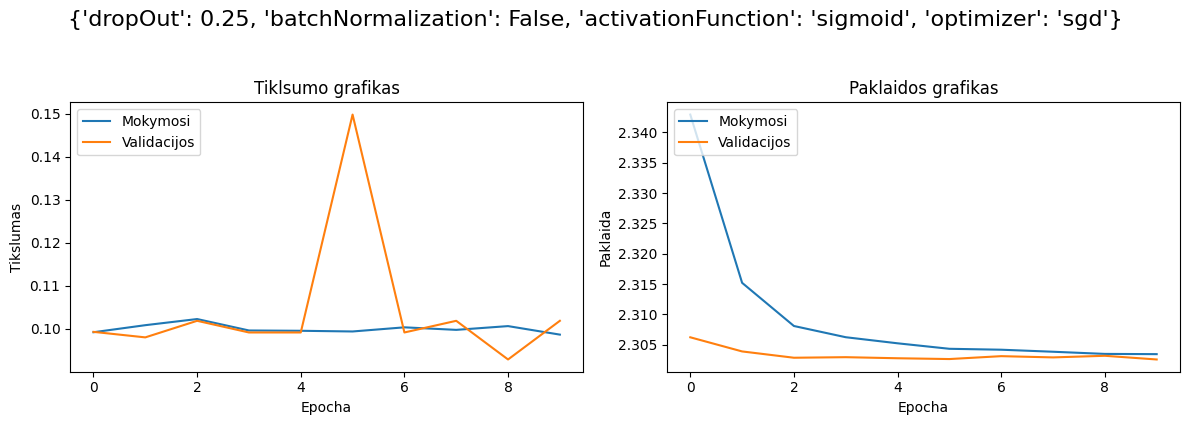

In [ ]:
import itertools

Parametrai = {'dropOut': [0,0.25], 'batchNormalization': [True,False], 'activationFunction': ['relu','sigmoid'], 'optimizer': ['adam','sgd']}

param_combinations = [{name: value for name, value in zip(Parametrai.keys(), combination)} for combination in itertools.product(*Parametrai.values())]


def ParametruTyrimui(ParametruRinkinys):
  model = createModel(class_labels, activationFunction=ParametruRinkinys['activationFunction'],
                    IMG_HEIGHT=28, IMG_WIDTH=28,
                    num_conv_layers=3, num_kernels=[16, 32, 64],
                    kernel_size=3, pool_size=2, dense_units=128, dropout_prob=ParametruRinkinys['dropOut'],batchNormalization=ParametruRinkinys['batchNormalization'])
  history = trainModel(model, x_train, y_train, x_val, y_val,
                     optimizer=ParametruRinkinys['optimizer'],
                     loss_function=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                     epochs=10, batch_size=32,verbos=1)
  plots(history,ParametruRinkinys)


for ParametruRinkinys in param_combinations:
    ParametruTyrimui(ParametruRinkinys)




# Geriausio atvejo rezultatai testavimo duomenims

In [5]:
#Dropout:0, batchNormalization: True, activationFunction: ReLU, optimizer:adam
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix

modelis = createModel(class_labels, activationFunction='relu',
                    IMG_HEIGHT=28, IMG_WIDTH=28,
                    num_conv_layers=3, num_kernels=[16, 32, 64],
                    kernel_size=3, pool_size=2, dense_units=128, dropout_prob=0,batchNormalization=True)
trainModel(modelis, x_train, y_train, x_val, y_val,
                     optimizer='adam',
                     loss_function=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                     epochs=10, batch_size=32,verbos=1)
y_pred = modelis.predict(x_test)
y_pred = [np.argmax(i) for i in y_pred]
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

test_accuracy = accuracy_score(y_test, y_pred)
print("Klasifikavimo tikslumas:",test_accuracy)

print("Eilučių ir stulpelių numeriai pagal klases")
for i in range(len(class_labels)):
  print(f"{i+1} - {class_labels[i]}")

Epoch 1/10
1750/1750 [==============================] - 12s 6ms/step - loss: 0.3876 - accuracy: 0.8574 - val_loss: 0.2943 - val_accuracy: 0.8943
Epoch 2/10
1750/1750 [==============================] - 10s 6ms/step - loss: 0.2637 - accuracy: 0.9014 - val_loss: 0.3044 - val_accuracy: 0.8869
Epoch 3/10
1750/1750 [==============================] - 9s 5ms/step - loss: 0.2290 - accuracy: 0.9143 - val_loss: 0.2648 - val_accuracy: 0.9010
Epoch 4/10
1750/1750 [==============================] - 10s 6ms/step - loss: 0.2002 - accuracy: 0.9262 - val_loss: 0.2467 - val_accuracy: 0.9126
Epoch 5/10
1750/1750 [==============================] - 10s 6ms/step - loss: 0.1784 - accuracy: 0.9323 - val_loss: 0.2628 - val_accuracy: 0.9111
Epoch 6/10
1750/1750 [==============================] - 9s 5ms/step - loss: 0.1589 - accuracy: 0.9408 - val_loss: 0.2815 - val_accuracy: 0.9061
Epoch 7/10
1750/1750 [==============================] - 10s 6ms/step - loss: 0.1409 - accuracy: 0.9457 - val_loss: 0.2569 - val_accu

In [ ]:
#Atrenkame 30 atsitiktiniu paveiksleliu ir ziurime kaip juos klasifikuoja.
atsitiktiniaiIndeksai = np.random.choice(np.arange(1, len(y_pred)), size=30, replace=False)
kiek = 0
print(class_labels)
for ind in atsitiktiniaiIndeksai:
  print(f"Tikra klasė: {class_labels[y_test[ind]]}, prognozuota: {class_labels[y_pred[ind]]}")

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
Tikra klasė: Bag, prognozuota: Bag
Tikra klasė: Pullover, prognozuota: Pullover
Tikra klasė: Trouser, prognozuota: Trouser
Tikra klasė: Sandal, prognozuota: Sandal
Tikra klasė: T-shirt/top, prognozuota: T-shirt/top
Tikra klasė: Pullover, prognozuota: Pullover
Tikra klasė: Bag, prognozuota: Bag
Tikra klasė: Pullover, prognozuota: Pullover
Tikra klasė: Pullover, prognozuota: Pullover
Tikra klasė: Dress, prognozuota: Dress
Tikra klasė: Sandal, prognozuota: Sandal
Tikra klasė: Bag, prognozuota: Bag
Tikra klasė: Dress, prognozuota: Dress
Tikra klasė: Coat, prognozuota: Coat
Tikra klasė: T-shirt/top, prognozuota: T-shirt/top
Tikra klasė: Coat, prognozuota: Coat
Tikra klasė: Shirt, prognozuota: Dress
Tikra klasė: Ankle boot, prognozuota: Ankle boot
Tikra klasė: Sandal, prognozuota: Sandal
Tikra klasė: Sneaker, prognozuota: Sneaker
Tikra klasė: Ankle boot, prognozuota: Ankle boot
Tikra kl